# **`pd.read_html()`**

* html 안의 tables를 추출할 수 있다. 
* 여러 개 추출이 가능하다.
* table 형태가 아닌 list의 형태에도 추출하기 때문에 추출한 뒤 내가 얻고자하는 table이 어디에 있는지 반드시 확인해야 한다.

## **올림픽 메달 집계(위키백과)**

* 올림픽 메달에 관한 여러 정보들이 표로 정리되어 있다. 

* **학습 목표**<br>
첫번째 표(국가별 메달 획득 현황)을 추출하고, 정보를 파악하고자 한다.

<div markdown="1" style="text-align:center; margin-bottom:10px">
<img src="./images/olympic_html.PNG" width="400">
</div> 

## **1) 추출**

### 데이터 추출하기

In [115]:
import pandas as pd

url = 'https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84'
tables = pd.read_html(url, encoding='utf-8')
print(f'추출된 Table은 모두 {len(tables)}개 입니다.')

추출된 Table은 모두 10개 입니다.


### 데이터 확인하기

In [123]:
data = tables[0]
data

,국가 (IOC 코드),하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
0,아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
149,독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
150,러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17
151,혼성 (ZZX) [ZZX],3,8,5,4,17,0,0,0,0,0,3,8,5,4,17


### 마지막 '총합' 행 제거하기

In [124]:
data = data.iloc[:-1,:]
data

,국가 (IOC 코드),하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
0,아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,짐바브웨 (ZIM) [ZIM],13,3,4,1,8,1,0,0,0,0,14,3,4,1,8
148,독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
149,독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
150,러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


### 컬럼 명 다시 설정하기

In [125]:
print(data.columns)
data.columns = ['국가', '하계_참가_횟수', '하계_금', '하계_은', '하계_동', '하계_메달_계',
                '동계_참가_횟수', '동계_금', '동계_은', '동계_동', '동계_메달_계', 
                '전체_참가_횟수', '전체_금', '전체_은', '전체_동', '전체_메달_계']
data.head()

Index(['국가 (IOC 코드)', '하계 참가 횟수', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       '계', '동계 참가 횟수', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', '계.1',
       '전체 참가 횟수', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', '총합'],
      dtype='object')


,국가,하계_참가_횟수,하계_금,하계_은,하계_동,하계_메달_계,동계_참가_횟수,동계_금,동계_은,동계_동,동계_메달_계,전체_참가_횟수,전체_금,전체_은,전체_동,전체_메달_계
0,아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### 국가에서 IOC 코드 분리, 국가는 한글만 추출

In [126]:
import re 

data['IOC_Code'] = data['국가'].apply(lambda x: re.search('(?<=\()(.*?)(?=\))', x).group())
data.loc[:,'국가(한글)'] = data['국가'].apply(lambda x: re.sub('[A-Z\(\)\[\]\s]','',x))
data[['국가', '국가(한글)', 'IOC_Code']].head()

# SettingWithCopyWarning : copy를 쓰지 않고 복제했을 때, 복제한 변수를 변형할 때 원본 데이터도 바뀌게 된다. 
# 위 상황에서는 변형된 결과로 사용할 예정이기에 warning을 무시했다.

C:\Users\narae\AppData\Local\Temp\ipykernel_16068\2894200746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IOC_Code'] = data['국가'].apply(lambda x: re.search('(?<=\()(.*?)(?=\))', x).group())
C:\Users\narae\AppData\Local\Temp\ipykernel_16068\2894200746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'국가(한글)'] = data['국가'].apply(lambda x: re.sub('[A-Z\(\)\[\]\s]','',x))


,국가,국가(한글),IOC_Code
0,아프가니스탄 (AFG),아프가니스탄,AFG
1,알제리 (ALG),알제리,ALG
2,아르헨티나 (ARG),아르헨티나,ARG
3,아르메니아 (ARM),아르메니아,ARM
4,오스트랄라시아 (ANZ) [ANZ],오스트랄라시아,ANZ


### 변수 순서 재정렬

In [127]:
data = data[['국가(한글)', 'IOC_Code', 
             '하계_참가_횟수', '하계_금', '하계_은', '하계_동', '하계_메달_계',
             '동계_참가_횟수', '동계_금', '동계_은', '동계_동', '동계_메달_계', 
             '전체_참가_횟수', '전체_금', '전체_은', '전체_동', '전체_메달_계']]
data.head()

,국가(한글),IOC_Code,하계_참가_횟수,하계_금,하계_은,하계_동,하계_메달_계,동계_참가_횟수,동계_금,동계_은,동계_동,동계_메달_계,전체_참가_횟수,전체_금,전체_은,전체_동,전체_메달_계
0,아프가니스탄,AFG,14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리,ALG,13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나,ARG,24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아,ARM,6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아,ANZ,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## **2) 분석**

### 메달 순위 Top10(전체, 하계, 동계, 금, 은, 동)

In [147]:
col_lst = ['전체_메달_계', '하계_메달_계', '동계_메달_계', '전체_금', '전체_은', '전체_동']
col_name = ['전체', '하계', '동계', '금', '은', '동']

medal_rank = pd.DataFrame()
medal_rank.index = range(1,11)
medal_rank.index.name = '순위'
for name, col in zip(col_name, col_lst):
    medal_rank[name] = data.sort_values(by=col, ascending=False).iloc[:10,0].tolist()
medal_rank

,전체,하계,동계,금,은,동
순위,,,,,,
1,미국,미국,노르웨이,미국,미국,미국
2,소련,소련,미국,소련,소련,소련
3,영국,영국,독일,독일,영국,프랑스
4,독일,프랑스,오스트리아,영국,독일,영국
5,프랑스,독일,캐나다,프랑스,프랑스,독일
6,이탈리아,이탈리아,소련,이탈리아,스웨덴,이탈리아
7,스웨덴,중화인민공화국,핀란드,중화인민공화국,이탈리아,스웨덴
8,중화인민공화국,오스트레일리아,스웨덴,스웨덴,중화인민공화국,캐나다
9,러시아,스웨덴,스위스,러시아,노르웨이,오스트레일리아


* 전체 메달 합계의 상위권 국가는 대부분 하계/동계에 상관없이 모두 상위권을 차지한다.
* 오스트레일리아 국가의 경우 하계 올림픽 종목에서 전체 메달 합계 상위권 국가보다 강세를 보인다.
* 노르웨이 국가의 경우에는 하계보다 동계 올림픽 종목에 더 강세인 것으로 보인다.

### 메달 순위 하위권

In [157]:
data.sort_values(by='전체_메달_계').iloc[:10,:]

,국가(한글),IOC_Code,하계_참가_횟수,하계_금,하계_은,하계_동,하계_메달_계,동계_참가_횟수,동계_금,동계_은,동계_동,동계_메달_계,전체_참가_횟수,전체_금,전체_은,전체_동,전체_메달_계
53,과테말라,GUA,14,0,1,0,1,1,0,0,0,0,15,0,1,0,1
92,네덜란드령안틸레스,AHO,13,0,1,0,1,2,0,0,0,0,15,0,1,0,1
111,사모아,SAM,9,0,1,0,1,0,0,0,0,0,9,0,1,0,1
33,지부티,DJI,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1
113,세네갈,SEN,14,0,1,0,1,5,0,0,0,0,19,0,1,0,1
87,몬테네그로,MNE,3,0,1,0,1,3,0,0,0,0,6,0,1,0,1
122,수단,SUD,12,0,1,0,1,0,0,0,0,0,12,0,1,0,1
37,에리트레아,ERI,5,0,0,1,1,1,0,0,0,0,6,0,0,1,1
83,모리셔스,MRI,9,0,0,1,1,0,0,0,0,0,9,0,0,1,1
15,보츠와나,BOT,10,0,1,0,1,0,0,0,0,0,10,0,1,0,1


In [152]:
col_lst = ['전체_메달_계', '하계_메달_계', '동계_메달_계', '전체_금', '전체_은', '전체_동']
col_name = ['전체', '하계', '동계', '금', '은', '동']

medal_rank = pd.DataFrame()
medal_rank.index = range(1,11)
medal_rank.index.name = '하위 순위'
for name, col in zip(col_name, col_lst):
    medal_rank[name] = data.sort_values(by=col).iloc[:10,0].tolist()
medal_rank

,전체,하계,동계,금,은,동
하위 순위,,,,,,
1,과테말라,러시아출신올림픽선수,아프가니스탄,아프가니스탄,아프가니스탄,보츠와나
2,네덜란드령안틸레스,리히텐슈타인,푸에르토리코,가나,에리트레아,세네갈
3,사모아,파라과이,포르투갈,과테말라,가이아나,세르비아몬테네그로
4,지부티,지부티,필리핀,가이아나,지부티,사모아
5,세네갈,가이아나,페루,아이티,이라크,과테말라
6,몬테네그로,사모아,파라과이,아이슬란드,요르단,그레나다
7,수단,몬테네그로,파나마,이라크,코소보,스리랑카
8,에리트레아,세네갈,파키스탄,쿠웨이트,쿠웨이트,수단
9,모리셔스,에리트레아,나이지리아,레바논,북마케도니아,에콰도르


### 메달 달성률(획득 메달 / 참가 횟수)

* 한 번 참가할 때마다 메달을 얼마나 획득하는가?

In [166]:
data['달성률'] = data['하계_메달_계'] / data['하계_참가_횟수']

success = data.sort_values(by='달성률', ascending=False).reset_index().drop('index', axis=1)[['국가(한글)','전체_참가_횟수','전체_메달_계','달성률']].iloc[:20,:]
success

,국가(한글),전체_참가_횟수,전체_메달_계,달성률
0,소련,18,1204,112.222222
1,연합,2,135,112.000000
2,미국,50,2828,93.444444
3,동독,11,519,81.800000
4,러시아,12,546,71.000000
5,중화인민공화국,21,608,54.600000
6,서독,11,243,40.800000
7,독일연합,6,137,39.333333
8,독일,28,855,38.437500
9,영국,51,883,30.392857


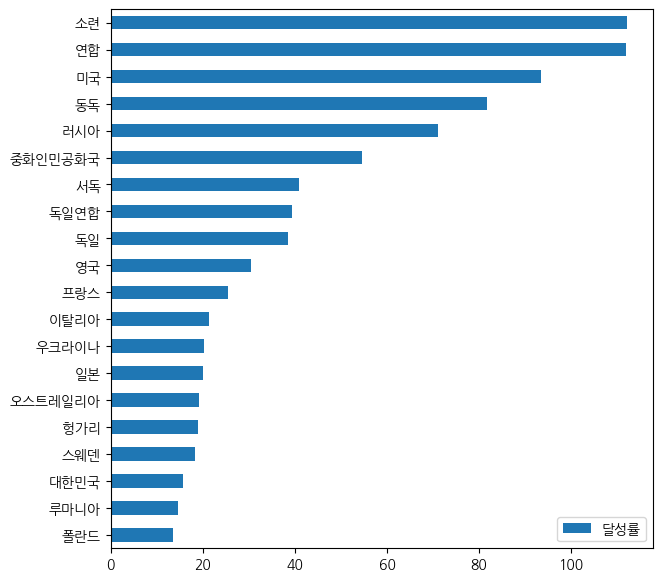

In [175]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')            # matplotllib
mpl.rcParams['axes.unicode_minus'] = False      # minus 처리

fig, ax = plt.subplots(figsize=(7, 7))
success[['국가(한글)', '달성률']].plot.barh(ax=ax)
ax.invert_yaxis()
ax.set_yticklabels(success['국가(한글)'])

plt.show()